# Exercise Sheet 3: Advanced NumPy

In the third exercise sheet we will work on advanced NumPy topics and application on machine learning tasks. You will implement a complete data science pipline, starting with data loading, plotting and data exploration, and finally implementing a machine learning model and applying it to the data.

Please do not use the following functions throughout the notebook:

- `map`
- `sum` (`np.sum` is allowed)
- `filter`
- `np.vectorize`
- `np.fromiter`
- `np.fromfunction`
- `np.apply_along_axis`

## Testing
Each task is provided with tests.
You can use these tests to practice test driven development (TDD), and to check your work, but please note that using them will likely make the tasks easier.
Please also note that the tests may not be exhaustive, i.e. even when passing all tests, your solution can still be imperfect, so please feel free to add to these tests to help assure the correctness of your solution.

In [3]:
# Please execute this setup cell.
from pathlib import Path
from unittest import TestCase

t = TestCase()

from minified import max_allowed_loops, no_imports
from illegal import IllegalContext, create_no_loop_illegals

## 1. Clustering 
### 1.1: Load data

Read the data from the file data.csv and save it in a dictionary. The letters in data.csv are the assigned labels and their corresponding data points. Each data point is two-dimensional and consists of the given x- and y-values. Return a dictionary with the letters/labels as keys. The value assigned to each key should be a list of x- and y-values. 

* Do not forget to cast the values to float.

In [4]:
@no_imports
@max_allowed_loops(1)
def read_from_file(file: str = "data.csv") -> dict:
    """
    Opens a csv file and parses it line by line. Each line consists of a label and two
    data dimensions. The function returns a dictionary where each key is a label and
    the value is a list of all the data points that have that label. Each data point
    is represented by a pair (2-element tuple) of floats.

    Args:
        file: The path to the file to open and parse. Defaults to
              "data.csv".

    Returns:
        dict: The parsed contents of the csv file
    """

### Please enter your solution here ###
    with open(file, 'r') as f:
        lines = f.readlines()
    
    D = dict()
    for line in lines:
        vals = line.strip().split(',')
        key = vals[0]
        if not vals[0] in D:
            D[key] = [(float(vals[1]), float(vals[2]))]
        else:
            D[key].append((float(vals[1]), float(vals[2])))

    return D

In [5]:
def test_read_from_file():
    tiny_result = read_from_file(file="tiny.csv")
    print("tiny_result", tiny_result)
    tiny_expected = {"A": [(0.8, 0.9), (0.2, 0.3)], "B": [(0.9, 0.1)], "C": [(2.0, 4.0)]}
    t.assertEqual(tiny_result, tiny_expected)

    D = read_from_file(file="data.csv")
    print(f"Keys of D: {D.keys()}", end="\n\n")
    for k, v in D.items():
        print(f"{len(v)} data points were assigned the label {k}")

    # Test All types
    t.assertIsInstance(D, dict)
    for d in D:
        t.assertIsInstance(d, str)
        t.assertIsInstance(D[d], list)
        for el in D[d]:
            t.assertIsInstance(el, tuple)
            t.assertIsInstance(el[0], float)
            t.assertIsInstance(el[1], float)
            
    letters = "MNU"
    t.assertEqual(set(D.keys()), set(letters))
    t.assertTrue(all(len(v) > 99 for v in D.values()))
    read_from_file.assert_not_too_many_loops()
    read_from_file.assert_no_imports()

test_read_from_file()

letters = "MNU"
D = read_from_file(file="data.csv")

tiny_result {'A': [(0.8, 0.9), (0.2, 0.3)], 'B': [(0.9, 0.1)], 'C': [(2.0, 4.0)]}
Keys of D: dict_keys(['N', 'M', 'U'])

155 data points were assigned the label N
168 data points were assigned the label M
132 data points were assigned the label U


### 1.2 Stack data

Use NumPy to stack all of the $N$ data points from the dictionary into one matrix $X$, containing the data.

Additionally, create one array $y$ with the corresponding integer labels. 

Each datapoint $x_i \in X, \> i = \overline{1..N}$ is of dimension $D=2$. The label assigned to a datapoint has to be a positive integer. Every letter label should map to one integer label in $y$ accordingly.

Mapping example: $A \rightarrow 0,\> C \rightarrow 1,\> K \rightarrow 2, ...$ (The order of the keys/labels defines the numeric label. The first key is mapped to 0 and so on.)

* Dataset $X$: $$\Large X \in \mathbb{R}^{(N, D)}$$
* Labels $y$: $$\Large y \in \mathbb{N}^{(N,)} $$

In [6]:
import numpy as np

illegals = create_no_loop_illegals(np, __builtins__)
no_loop_illegals_context = IllegalContext(illegals, globals())

In [7]:
@no_imports
@max_allowed_loops(1)
def stack_data(D: dict) -> tuple[np.ndarray, np.ndarray]:
    """
    Convert a dictionary dataset into two arrays of data and labels. The dictionary
    keys represent the labels and the value mapped to each key is a list that
    contains all the data points belonging to that label. The output is two arrays
    the first is the data points in a single 2d array and a vector of integers
    with the corresponding label for each datapoint. The order of the data points is
    preserved according to the order in the dictionary and the lists.

    The labels are converted from a string to a unique int.

    The data points are entered in the same order as the keys in the `D`. First,
    all the data points of the first key are entered then the second and so on.
    Within one label order also remains.

    Args:
        D: The dictionary that is supposed to get stacked.

    Returns:
        tuple: The two output arrays. The first is a float matrix containing all the
               data points. The second is an int-vector containing the labels for each data point.
    """
    i = 0
    X = np.array([])
    y = []
    for key, vals in D.items():
        np_vals = np.array(vals)
        X = np.append(X, np_vals)
        y.extend([i] * len(vals))
        i += 1
    
    X = X.reshape(-1, 2)
    y = np.array(y,dtype=int)

    return X, y

In [8]:
def test_stack_data():
    tiny_expected_X, tiny_expected_y = (
        np.array(
            [
                [0.0, 0.1],
                [0.9, 0.7],
                [0.8, 0.3],
            ]
        ),
        np.array([0, 1, 1]),
    )
    tiny_result_X, tiny_result_y = stack_data(
        {"B": [(0.0, 0.1)], "A": [(0.9, 0.7), (0.8, 0.3)]}
    )
    print(tiny_result_X, tiny_result_y)
    np.testing.assert_allclose(tiny_expected_X, tiny_result_X)
    np.testing.assert_allclose(tiny_expected_y, tiny_result_y)

    X, y = stack_data(D)
    print(X.shape, y.shape)
    print(X.dtype, y.dtype)

    expected_len = sum(len(x) for x in D.values())
    print(f"Expected length for X, y: {expected_len}")

    t.assertEqual(X.shape, (expected_len, 2))
    t.assertEqual(y.shape, (expected_len,))

    t.assertEqual(X.dtype, np.float64)
    t.assertEqual(y.dtype, np.int64)

    t.assertEqual(set(y), set(range(len(D))))

    with no_loop_illegals_context:
        X, y = stack_data(D)

    stack_data.assert_not_too_many_loops()
    stack_data.assert_no_imports()

test_stack_data()

X, y = stack_data(D)

[[0.  0.1]
 [0.9 0.7]
 [0.8 0.3]] [0 1 1]
(455, 2) (455,)
float64 int64
Expected length for X, y: 455


### 1.3 Return clusters

Write a function that returns a list of all $k$ clusters $C$. A cluster $C_k$ is composed of every datapoint $X_i$ assigned with the label $k$. There are as many clusters $C_k$ as there are unique labels in $y$.


$$\Large{\mathcal{C} = \{ C_1, C_2, \cdots, C_k \},\quad k = \overline{1..K}}$$

<br>

$$\Large C_k \in \mathbb{R}^{(N_k, D)}$$

In [9]:
@no_imports
@max_allowed_loops(1)
def get_clusters(X: np.ndarray, y: np.ndarray) -> list[np.ndarray]:
    """
    Receives a labeled dataset and splits the data points according to the label.

    Args:
        X: The dataset
        y: The label for each point in the dataset

    Returns:
        list: A list of arrays where the elements of each array are data points belonging to
              the label on that index

    Example:
    >>> get_clusters(
            np.array([[0.8, 0.7], [0, 0.4], [0.3, 0.1]]),
            np.array([0,1,0])
        )
    >>> [array([[0.8, 0.7],[0.3, 0.1]]),
         array([[0. , 0.4]])]
    """
    num_indices = len(set(y))
    out = [np.array([], dtype=float)] * num_indices
    for xi, yi in zip(X, y):
        out[yi] = np.append(out[yi], xi)
        out[yi] = out[yi].reshape(-1, 2)
    return out

In [10]:
def test_get_clusters():
    tiny_result = get_clusters(
        np.array(
            [
                [0.8, 0.7],
                [0, 0.4],
                [0.3, 0.1],
            ]
        ),
        np.array([0, 1, 0]),
    )
    print(tiny_result)
    tiny_expected = [
        np.array(
            [
                [0.8, 0.7],
                [0.3, 0.1],
            ]
        ),
        np.array(
            [
                [0.0, 0.4],
            ]
        ),
    ]
    for r, e in zip(tiny_result, tiny_expected):
        np.testing.assert_allclose(r, e)

    clusters = get_clusters(X, y)
    # output is a list
    t.assertIsInstance(clusters, list)
    t.assertEqual(len(letters), len(clusters))

    # all elements are arrays
    for el in clusters:
        t.assertIsInstance(el, np.ndarray)

    t.assertEqual(sum(map(len, clusters)), len(X))

    with no_loop_illegals_context:
        clusters = get_clusters(X, y)


    get_clusters.assert_not_too_many_loops()
    get_clusters.assert_no_imports()

test_get_clusters()

clusters = get_clusters(X, y)

[array([[0.8, 0.7],
       [0.3, 0.1]]), array([[0. , 0.4]])]


### 1.4 Split train test data

Split the data $X$ into training and test data.

* Return a list of clusters for training and a list of cluster for testing.

* Utilize the function `train_test_idxs` from utils to split the data.

* The train-test ratio should be 80-20

* Use the function implemented in Exercise 1.3 __get_clusters(X,y)__ to get the clusters.

* Remember that when you split the dataset you need to keep the relationship between the data and the labels. Do not split the data and labels independently

In [11]:
from utils import train_test_idxs

print("train_test_idxs specification:\n", train_test_idxs.__doc__)

train_indices, test_indices = train_test_idxs(L=20, test_ratio=0.2)
print(f"train_indices = {train_indices}")
print(f"test_indices = {test_indices}")

train_test_idxs specification:
 
Returns indices that can be used as train and test data.

Args:
    L (int): The size of the dataset
    test_ratio (float): The ratio [0-1] of indices that should be put in the test
    set

Returns:
    Tuple[np.ndarray, np.ndarray]: The training and testset indices

train_indices = [ 4  6 11  3  0 12  2  5  1 18 10 17 19  7 13  8]
test_indices = [16 14 15  9]


In [12]:
@no_imports
@max_allowed_loops(0)
def split(X: np.ndarray, y: np.ndarray) -> tuple[list[np.ndarray], list[np.ndarray]]:
    """
    Split the data into train and test sets. The training and test set are
    clustered by label using `get_clusters`. The size of the training set
    is 80% of the whole dataset.

    Args:
        X: The dataset (2d)
        y: The label of each datapoint in the dataset `X` (1d)

    Returns:
        tuple: The clustered training and test sets
    """

### Please enter your solution here ###
    trainI, testI = train_test_idxs(len(X), 0.2)
    trainX, trainy = X[trainI], y[trainI]
    testX, testy = X[testI], y[testI]
    tr_clusters, te_clusters = get_clusters(trainX, trainy), get_clusters(testX, testy)
    return tr_clusters, te_clusters

In [13]:
def test_split():
    output = split(X, y)
    tr_clusters, te_clusters = output
    t.assertIsInstance(output, tuple)
    t.assertIsInstance(tr_clusters, list)
    t.assertIsInstance(te_clusters, list)


    t.assertEqual(len(tr_clusters), len(te_clusters))
    t.assertEqual(len(tr_clusters), len(letters))
    t.assertEqual(len(te_clusters), len(letters))

    for el in tr_clusters + te_clusters:
        t.assertIsInstance(el, np.ndarray)


    n_in_train = sum(map(len, tr_clusters))
    n_in_test = sum(map(len, te_clusters))
    t.assertEqual(n_in_train + n_in_test, len(X))

    percent_train = n_in_train / len(X)
    print(f"percent_train = {percent_train}")
    t.assertGreaterEqual(percent_train, 0.79)
    t.assertLessEqual(percent_train, 0.81)

test_split()

tr_clusters, te_clusters = split(X, y)

percent_train = 0.8


### 1.5 Cluster mean

Compute the mean $\mu_k$ of each cluster $C_k$. Return a list of all cluster means $\mu$.


$$\Large{\mu = \{ \mu_1, \mu_2, \cdots, \mu_k \},\quad k = \overline{1..K}}$$



* Number of elements in a cluster $k$:
$$\Large{N_k = | C_k |, \quad C_k \in \mathbb{R}^{(N_k, D)}}$$



* The $k$-th cluster mean $\mu_k$:
$$\Large{ \mu_k = \frac{1}{N_k}\sum_{x_i \in C_k} x_i }$$

In [14]:
@no_imports
@max_allowed_loops(1)
def calc_means(clusters: list[np.ndarray]) -> np.ndarray:
    """
    For a collection of clusters calculate the mean for each cluster

    Args:
        clusters: A list of 2d arrays. Each array in the list corresponds to a cluster

    Returns:
        np.ndarray: A matrix where each row represents the mean of a cluster
    """
    mus = np.array([])
    for c in clusters:
        mu = [np.sum(c[:, 0]) / c.shape[0], np.sum(c[:, 1]) / c.shape[0]]
        mus = np.append(mus, mu)

    return mus.reshape(-1, 2)

In [15]:
def test_calc_mean():
    tiny_clusters = [
        np.array([[0.2, 0.3], [0.1, 0.2]]),
        np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
    ]
    tiny_result = calc_means(tiny_clusters)
    print(tiny_result, end="\n\n")
    tiny_expected = np.array([[0.15, 0.25], [0.7, 0.7]])
    np.testing.assert_allclose(tiny_result, tiny_expected)

    means = calc_means(tr_clusters)
    print(means)
    t.assertIsInstance(means, np.ndarray)
    t.assertEqual(means.shape, (len(letters), 2))

test_calc_mean()

means = calc_means(tr_clusters)

[[0.15 0.25]
 [0.7  0.7 ]]

[[ 1.013032    1.475472  ]
 [-0.74180153 -0.82074809]
 [ 7.20163889  6.86493519]]


## 2. Visualization
### 2.1 Scatter plot of clusters

- Create a scatter plot of size 8x8. 

- Plot each datapoint of a cluster $x_{ik} \in  C_k$ as dots with an alpha value of 0.6 and a label. 

- The plot label should contain both the cluster's letter label and its integer label. 

- Further, plot the cluster's mean $\mu_k$ as a red cross of size 7. The plot should also have a label for each cluster's mean, giving information on its exact coordinates. 

- The title of the plot should be _'Scatter plot of the clusters'_ in font size 20.

* Label for the scatter plots example: _A = 0_
* Label for the cluster means example (use LaTeX): _$\mu_A:$[1.23  0.56]_

- If the mean of each cluster is not provided, use `calc_means(clusters)` to calculate the means.

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
@no_imports
def plot_scatter_and_mean(clusters: list[np.ndarray], letters: str, means=None) -> None:
    """
    Create a scatter plot visualizing each cluster and its mean

    Args:
        clusters: A list containing arrays representing each cluster
        letters: The "name" of each cluster
        means: The mean of each cluster. If `None` the mean of each cluster in `clusters` should be calculated and used.
    """
    assert len(letters) == len(clusters)
    if means is None:
        means = calc_means(clusters)
    fig = plt.figure(figsize=(8,8))
    for i, c in enumerate(clusters):
        plt.plot(c[:, 0], c[:, 1], 'o', alpha=0.6, label=f"{letters[i]} = {i}")
        plt.plot(means[i][0], means[i][1], '+', color='red', markersize=7, markeredgewidth=2, label=f'$\mu_{letters[i]}:${means[i]}')
        # plt.text(means[i][0] + 0.2, means[i][1] + 0.2, f'{letters[i]}, {i}')
        # plt.text(f'{l}, {letters.index(l)}')
    plt.title("Scatter plot of the clusters")
    plt.legend()
    plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\maxim\AppData\Local\Temp\ipykernel_12844\414371576.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(means[i][0], means[i][1], '+', color='red', markersize=7, markeredgewidth=2, label=f'$\mu_{letters[i]}:${means[i]}')
<unknown>:17: SyntaxWarning: invalid escape sequence '\m'


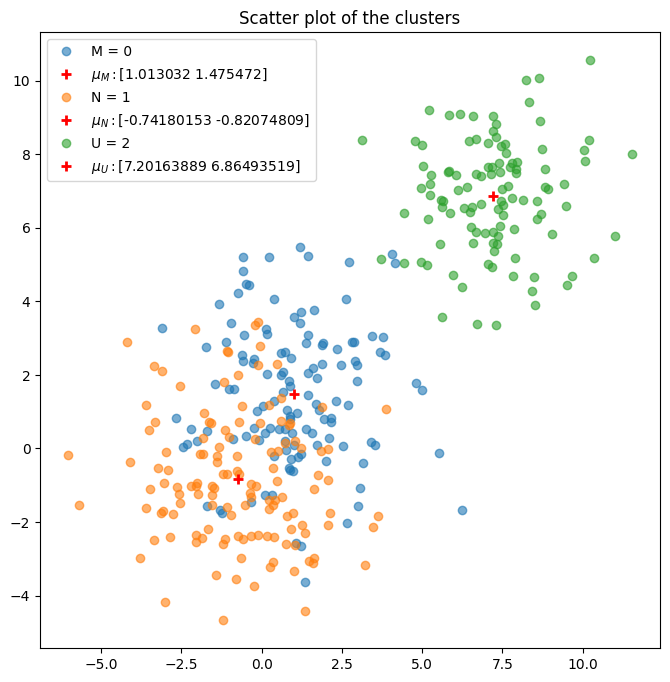

In [86]:
plot_scatter_and_mean(tr_clusters, letters, means=None)

### 2.2 Plot clusters projected to onto an axis 

 - To make it easier to visually analyse the the differences between clusters, the data can be projected onto an axis. Plot a histogram for the projection onto the given axis. 
 
 - The histogram should have 30 bins, be 50% transparent and labeled. The area under the histogram should be normalized and sum to 1 to represent a proper distribution. It can be done by setting the corresponding parameter.  - The bars width should have 4/5 of the bins width.


- Create a histogram of size 14x5.
* Plot the mean of each cluster as a vertical, dashed, red line.
* Label for the histograms example: _A_
* The title of the plot should be dynamic, have a font size of 20 and explain the axis of the projection, e.g. "Projection to axis 0 histogram plot" or "Projection to axis 1 histogram plot", depending on the axis.

In [ ]:
@no_imports
def plot_projection(clusters: list[np.ndarray], letters: str, means: np.ndarray, axis: int=0):
    """
    Plot a histogram of the dimension provided in `axis`.

    Args:
        clusters: The clusters from which to create the histogram
        letters: The string representation of each class
        means: The mean of each class
        axis: The axis from which to create the histogram. Defaults to 0.
    """

### Please enter your solution here ###



In [ ]:
plot_projection(tr_clusters, letters, means, axis=0)

## 3. Analyse cluster distributions
### 3.1 Within cluster covariance

Compute the within-cluster covariance $S_w$ to further analyze the distribution of the data in the clusters. Sum up the covariance matrices of each cluster to get the one average within-cluster covariance matrix. **This is shown in the formula below.** Covariance matrices describe the relationship between the x and y dimensions of the data.

$$\boxed{\Large{S_w  = \sum_{k=1}^K \sum_{x_i \in C_k} (x_i - \mu_k)} (x_i - \mu_k)^{\top}, \quad S_w \in \mathbb{R}^{(D, D)}}$$


* Reminder: Data $C$ is a set of clusters $C_k$, where $K$ is the total number of clusters. $${\mathcal{C} = \{ C_1, C_2, \cdots, C_k \},\quad k = \overline{1..K}}$$

* Number of elements in a cluster $k$: $${N_k = | C_k |, \quad C_k \in \mathbb{R}^{(N_k, D)}}$$
<br>

* $k$-th cluster mean $\mu_k$: $${ \mu_k = \frac{1}{N_k}\sum_{x_i \in C_k} x_i }$$

In [ ]:
@no_imports
@max_allowed_loops(1)
def within_cluster_cov(clusters: list[np.ndarray]) -> np.ndarray:
    """
    Calculate the within-class covariance for a collection of clusters

    Args:
        clusters: A list of clusters each consisting of
        an array of data points.

    Returns:
        np.ndarray: The within-cluster covariance

    Example:
        >>> within_cluster_cov(
            [array([[0.2, 0.3], [0.1, 0.2]]), array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]])]
        )
        >>> array([[0.025, 0.025],
                   [0.025, 0.085]])
    """
    d = clusters[0].shape[1]
    S_w = np.zeros((d, d))

### Please enter your solution here ###



In [ ]:
def test_within_cluster_cov():
    tiny_clusters = [
        np.array([[0.2, 0.3], [0.1, 0.2]]),
        np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
    ]
    tiny_expected = np.array([[0.025, 0.025], [0.025, 0.085]])
    tiny_result = within_cluster_cov(tiny_clusters)
    print(tiny_result)
    np.testing.assert_allclose(tiny_expected, tiny_result)

    S_w = within_cluster_cov(tr_clusters)
    print(S_w)
    t.assertIsInstance(S_w, np.ndarray)
    t.assertEqual(S_w.shape, (2, 2))

    # check if symmetric
    np.testing.assert_allclose(S_w, S_w.T)

test_within_cluster_cov()

S_w = within_cluster_cov(tr_clusters)

### 3.2 Between cluster covariance

To compute the between cluster covariance, the calculation of the mean of means is necessary. In the function `calc_mean_of_means(clusters)` you must reuse your function `calc_means(clusters)`.


* Mean of means: $$\Large{ \mu = \frac{1}{N}\sum_{C_i \in \mathcal{C}}{C_i}},\quad \text{where}\quad N = |\mathcal{C}|$$


The between-cluster covariance describes the relation of the data points from one cluster to the other. It focuses on the differences rather than the similarities. **You only have to implement the given formulas**, and do not need to fully understand the underlying concept. 

* Between cluster covariance: $$\boxed{\Large{S_b = \sum_{k=1}^K  N_k (\mu_k - \mu) (\mu_k - \mu)^{\top}}}$$

where $\mu$ represents the mean of means and $\mu_k$ represents the mean of the $k$-th cluster.

*Hint:* For the `between_cluster_cov` consider the `np.outer` function

In [ ]:
@no_imports
@max_allowed_loops(0)
def calc_mean_of_means(clusters: list[np.ndarray]) -> np.ndarray:
    """
    Given a collection of data points divided into clusters, calculate the
    mean of all cluster means.
    
    Args:
        clusters: A list of clusters represented in arrays

    Returns:
        np.ndarray: A single data point that represents the mean of all the
                    cluster means
    """

### Please enter your solution here ###



In [ ]:
def test_calc_mean_of_means():
    tiny_result = calc_mean_of_means(
        [
            np.array([[0.222, 0.333], [0.1, 0.2]]),
            np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
        ]
    )
    print(tiny_result)
    tiny_expected = np.array([0.4305, 0.48325])
    np.testing.assert_allclose(tiny_expected, tiny_result)

    mean_of_means = calc_mean_of_means(tr_clusters)
    print(mean_of_means)
    t.assertIsInstance(mean_of_means, np.ndarray)
    t.assertEqual(mean_of_means.shape, (2,))

test_calc_mean_of_means()
mean_of_means = calc_mean_of_means(tr_clusters)

In [ ]:
@no_imports
@max_allowed_loops(1)
def between_cluster_cov(clusters: list[np.ndarray],
                        cluster_means: list[np.ndarray],
                        mean_of_means: np.ndarray) -> np.ndarray:
    """
    Calculate the covariance between clusters.

    Args:
        clusters: A list of data points divided by cluster
        cluster_means: A list of vectors representing the mean of each cluster
        mean_of_means: A vector, the mean of all data points

    Returns:
        np.ndarray: Covariance between clusters
    """
    d = clusters[0].shape[1]
    S_b = np.zeros((d, d))

    # BEGIN SOLUTION
    mus = cluster_means  # I
    for mu, cluster in zip(mus, clusters):  # II
        N_c = cluster.shape[0]  # I
        outer = np.outer((mu - mean_of_means), (mu - mean_of_means))  # III
        S_b += N_c * outer  # x @ x.T # II

    return S_b

### Please enter your solution here ###



In [ ]:
def test_between_cluster_cov():
    tiny_clusters = [
        np.array([[0.2, 0.3], [0.1, 0.2]]),
        np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
    ]
    tiny_means = [np.array([0.15, 0.25]), np.array([0.7, 0.7])]
    tiny_mean_of_means = np.array([0.425, 0.475])
    between_cluster_cov(tiny_clusters, tiny_means, tiny_mean_of_means)

    S_b = between_cluster_cov(tr_clusters, means, mean_of_means)
    print(S_b)
    t.assertIsInstance(S_b, np.ndarray)
    t.assertEqual(S_b.shape, (2, 2))
    np.testing.assert_allclose(S_b, S_b.T)

    t.assertTrue(np.all(S_b > 3000))
    t.assertTrue(np.all(S_b < 5000))

test_between_cluster_cov()

S_b = between_cluster_cov(tr_clusters, means, mean_of_means)

### 3.3 Rotation matrix

Compute rotation matrix $W$. To find the rotation matrix you first need to find a matrix $A$ so that the within-cluster covariance matrix can be transformed into the between-cluster covariance matrix. 

$$\Large{ S_w A = S_b}$$

Next, find the eigenvalues of this matrix $A$. The eigenvectors describe the direction in which the matrix $A$ does _not_ transform and instead only scales. These vectors form the rotation matrix, as they show the directions in which the difference between $S_w$ and $S_b$ is maximized. **Implement the given formulas!**

$$ \Large{AW = \lambda W}$$
* Return the rotation matrix and the index of its largest axis (according to the eigenvalues).

In [ ]:
@no_imports
@max_allowed_loops(0)
def rotation_matrix(S_w: np.ndarray, S_b: np.ndarray) -> tuple[np.ndarray, int]:
    """
    Calculate the transformation matrix given the within- and between cluster
    covariance matrices.

    Args:
        S_w: The within-cluster covariance
        S_b: The between-cluster covariance

    Returns:
        tuple: The transformation matrix and the axis along with the transformed data achieves
               maximal variance
    """

### Please enter your solution here ###



In [ ]:
def test_rotation_matrix():
    tiny_S_w = np.array([[0.025, 0.025], [0.025, 0.085]])
    tiny_S_b = np.array([[0.378125, 0.309375], [0.309375, 0.253125]])
    tiny_result_M, tiny_result_max_axis = rotation_matrix(tiny_S_w, tiny_S_b)
    print(tiny_result_M, tiny_result_max_axis)
    tiny_expected_M, tiny_expected_max_axis = (
        np.array([[0.99752952, -0.63323779], [-0.07024856, 0.7739573]]),
        0,
    )
    np.testing.assert_allclose(tiny_expected_M, tiny_result_M)
    np.testing.assert_allclose(tiny_expected_max_axis, tiny_result_max_axis)

    output = rotation_matrix(S_w, S_b)
    t.assertIsInstance(output, tuple)
    t.assertEqual(len(output), 2)
    W_rot, max_axis = output
    t.assertIsInstance(W_rot, np.ndarray)
    t.assertIsInstance(max_axis, np.int64)
    t.assertEqual(W_rot.shape, (2, 2))

test_rotation_matrix()

W_rot, max_axis = rotation_matrix(S_w, S_b)

### 3.4 Apply rotation matrix

Apply the rotation matrix to the clusters and return the rotated clusters in a list. 

In [ ]:
@no_imports
@max_allowed_loops(1)
def rotate_clusters(W_rot: np.ndarray, clusters: list[np.ndarray]) -> list[np.ndarray]:
    """
    Rotate all the data points in all the clusters

    Args:
        W_rot: The rotation matrix
        clusters: The list of data points divided into clusters that will be rotated

    Returns:
        list: The rotated data points divided by cluster
    """

### Please enter your solution here ###



In [ ]:
def test_rotate_clusters():
    rad = np.deg2rad(30)
    c, s = np.cos(rad), np.sin(rad)
    rot30 = np.array([[c, -s], [s, c]])
    tiny_clusters = [
        np.array([[0.2, 0.3], [0.1, 0.2]]),
        np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
    ]
    tiny_rotated_result = rotate_clusters(rot30, tiny_clusters)
    print(tiny_rotated_result)
    tiny_rotated_expected = [
        np.array([[0.32320508, 0.15980762], [0.18660254, 0.12320508]]),
        np.array([[1.14282032, 0.37942286], [0.85621778, 0.0830127], [0.86961524, 0.30621778]]),
    ]
    for r, e in zip(tiny_rotated_result, tiny_rotated_expected):
        np.testing.assert_allclose(r, e)

    rot_tr_clusters = rotate_clusters(W_rot, tr_clusters)
    t.assertIsInstance(rot_tr_clusters, list)
    for norm, rotated in zip(tr_clusters, rot_tr_clusters):
        t.assertIsInstance(rotated, np.ndarray)
        t.assertEqual(norm.shape, rotated.shape)

test_rotate_clusters()

rot_tr_clusters = rotate_clusters(W_rot, tr_clusters)

### Goal

Using the rotated clusters, we can now plot the clusters projected onto the axis with highest eigenvalue as histograms. Here we can draw a more accurate line separating the clusters than we could before. This line can be used for classifying data through drawing a simple line between clusters.

In [ ]:
plot_scatter_and_mean(rot_tr_clusters, letters)
means = calc_means(rot_tr_clusters)
plot_projection(rot_tr_clusters, letters, means, axis=max_axis)